In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline
# General libraries.
import pandas as pd 
import re
import numpy as np
import matplotlib.pyplot as plt
# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *
from sklearn.cluster import KMeans

import nltk
from tqdm import tqdm

In [9]:
df = pd.read_csv('/Users/daphneyang/Desktop/5YMIDS_SP21/w266/266_final/nyt_data_collection/dataset/train_dataset.csv')[:1000]
df.head()

,headline,date,doc_type,material_type,section,abstract,first_paragraph,keywords,web_url
0,What Does a More Contagious Virus Mean for Sch...,2021-01-14,article,News,NaN,The coronavirus variant discovered in Britain ...,[Here’s how you can get the coronavirus vaccin...,"['your-feed-science', 'Coronavirus (2019-nCoV)...",https://www.nytimes.com/2021/01/14/health/coro...
1,They Talk About Porn in This Show. Audience Pa...,2018-03-16,article,News,NaN,"“Prurience,” a new immersive theater piece by ...",Christopher Green has been a fixture on the fr...,"['Theater', 'Pornography']",https://www.nytimes.com/2018/03/16/theater/pru...
2,Waiting for the Immigration Raids,2019-07-15,article,News,NaN,“The fear is there every single day.” We spoke...,Listen and subscribe to our podcast from your ...,"['Deportation', 'Illegal Immigration', 'Immigr...",https://www.nytimes.com/2019/07/15/podcasts/th...
3,Judge John Hodgman on Half-Empty Garbage Bags,2017-04-07,article,News,NaN,No amount of money saved is worth living with ...,Lauren writes: My husband says it’s wasteful t...,"['Comedy and Humor', 'Waste Materials and Disp...",https://www.nytimes.com/2017/04/07/magazine/ju...
4,A.I. Is Helping Scientists Understand an Ocean...,2020-04-08,article,News,NaN,Machine-learning applications are proving to b...,This article is part of our latest Artificial ...,"['Oceans and Seas', 'Water Pollution', 'Endang...",https://www.nytimes.com/2020/04/08/science/ai-...


In [10]:
## creating functions
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import string


def lemmatize_text(text):
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = WordNetLemmatizer()
    lem_text = []
    for w in w_tokenizer.tokenize(text):
        lem_text.append(lemmatizer.lemmatize(w))
        lem_text.append(" ")
    return ''.join(lem_text)


def clean_text(text):
    """ Takes Text and does the following
    1. Remove Stopwords - remove common stopwords in English
    2. Removing Numbers -- may want to revisit this if numbers are important (thinking like covid cases and such)
    3. Lemmatizes Text - revert word to its base form (ex. studies, studying to study)
     """
    text = str(text)
    if len(text) <1:
        # if no available first paragraph
        return " "
    else:
        no_numbers = re.sub(r'[0-9]', "", text)
        no_punct = re.sub(r'[^\w\s]', '', no_numbers)
    # no_punct = [char for char in no_numbers if char not in string.punctuation]
    # no_punct = " ".join(no_punct)
    
    # no_punct = "".join(no_numbers)
    
        lower_text = [word.lower() for word in no_punct.split()
                  if word not in stopwords.words("english")]
        lower_text = ' '.join(lower_text)
        lemm_text = lemmatize_text(lower_text)
        if len(lemm_text) < 1:
        # in empty after regex
            return " "
        else:
            return lemm_text


In [11]:
text = "There are 4572 students in CS61B and CS1A."
no_numbers = re.sub(r'[0-9]', "", text)
no_punct = re.sub(r'[^\w\s]', '', no_numbers)
lower_text = [word.lower() for word in no_punct.split()
                if word not in stopwords.words("english")]
lower_text = ' '.join(lower_text)
lemm_text = lemmatize_text(lower_text).strip()
lemm_text

'there student csb csa'

In [192]:
## cleaning function
df['cleaned_first_paragraph'] = df['first_paragraph'].apply(clean_text)
df.head()

,headline,date,doc_type,material_type,section,abstract,first_paragraph,keywords,web_url,cleaned_first_paragraph
0,What Does a More Contagious Virus Mean for Sch...,2021-01-14,article,News,NaN,The coronavirus variant discovered in Britain ...,[Here’s how you can get the coronavirus vaccin...,"['your-feed-science', 'Coronavirus (2019-nCoV)...",https://www.nytimes.com/2021/01/14/health/coro...,here get coronavirus vaccine new york city
1,They Talk About Porn in This Show. Audience Pa...,2018-03-16,article,News,NaN,"“Prurience,” a new immersive theater piece by ...",Christopher Green has been a fixture on the fr...,"['Theater', 'Pornography']",https://www.nytimes.com/2018/03/16/theater/pru...,christopher green fixture fringier edge britis...
2,Waiting for the Immigration Raids,2019-07-15,article,News,NaN,“The fear is there every single day.” We spoke...,Listen and subscribe to our podcast from your ...,"['Deportation', 'Illegal Immigration', 'Immigr...",https://www.nytimes.com/2019/07/15/podcasts/th...,listen subscribe podcast mobile device via app...
3,Judge John Hodgman on Half-Empty Garbage Bags,2017-04-07,article,News,NaN,No amount of money saved is worth living with ...,Lauren writes: My husband says it’s wasteful t...,"['Comedy and Humor', 'Waste Materials and Disp...",https://www.nytimes.com/2017/04/07/magazine/ju...,lauren writes my husband say wasteful throw aw...
4,A.I. Is Helping Scientists Understand an Ocean...,2020-04-08,article,News,NaN,Machine-learning applications are proving to b...,This article is part of our latest Artificial ...,"['Oceans and Seas', 'Water Pollution', 'Endang...",https://www.nytimes.com/2020/04/08/science/ai-...,this article part latest artificial intelligen...


In [193]:
def compare_clean(idx):
    print(f"Row Number: {idx}\n")
    print(f"Original text: \n {df.first_paragraph[idx]} \n")
    print(f"Cleaned text: \n {df.cleaned_first_paragraph[idx]}")

In [194]:
compare_clean(6)

Row Number: 6

Original text: 
 SAN FRANCISCO — Apple customers have a lot to digest this summer. 

Cleaned text: 
 san francisco apple customer lot digest summer 


In [195]:
## Document Clustering using TFIDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.cleaned_first_paragraph.to_list())

In [196]:
## Output of first 10 feature names from small training sample
print(vectorizer.get_feature_names()[:10])

['_________', 'aaron', 'aback', 'abandon', 'abandoned', 'abating', 'abbas', 'abbreviated', 'abcd', 'abe']


In [197]:
## Clustering
kmeans = KMeans(n_clusters=4)
kmeans_fit = kmeans.fit(X)
kmeans_fit

KMeans(n_clusters=4)

In [198]:
SSD = []
K = range(1,50)
for k in tqdm(K):
    km = KMeans(n_clusters = k)
    km = km.fit(X)
    SSD.append(km.inertia_)

100%|██████████| 49/49 [00:27<00:00,  1.79it/s]


Text(0.5, 1.0, 'Elbow Method For Optimal Clusters')

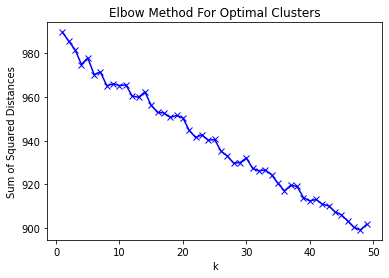

In [199]:
import matplotlib.pyplot as pyplot
plt.plot(K, SSD, "bx-")
plt.xlabel('k')
plt.ylabel("Sum of Squared Distances")
plt.title('Elbow Method For Optimal Clusters')

In [202]:
matching = [s for s in keywords if any(xs in s for xs in ['Coronavirus'])]

In [204]:
keyword_vectorizer = TfidfVectorizer()
X_keywords = vectorizer.fit_transform(covid_df.cleaned_first_paragraph.to_list())

In [207]:
SSD_keywords = []
K_keywords = range(1,100)
for k in tqdm(K_keywords):
    km = KMeans(n_clusters = k)
    km = km.fit(X)
    SSD_keywords.append(km.inertia_)

100%|██████████| 99/99 [01:49<00:00,  1.11s/it]


Text(0.5, 1.0, 'Elbow Method For Optimal Clusters')

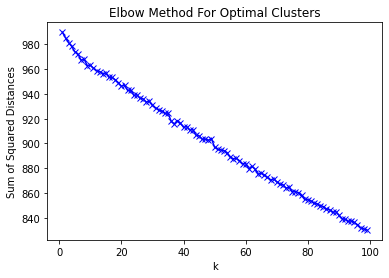

In [208]:
plt.plot(K_keywords, SSD_keywords, "bx-")
plt.xlabel('k')
plt.ylabel("Sum of Squared Distances")
plt.title('Elbow Method For Optimal Clusters')

# Subsetting Data

In [2]:
df = pd.read_csv('/Users/daphneyang/Desktop/5YMIDS_SP21/w266/266_final/nyt_data_collection/dataset/full_nyt_dataset.csv')

In [15]:
def data_subset(df, keyword, column = "first_paragraph"):
    df = df.dropna(subset=[column])
    subset = df[df[column].str.lower().str.contains(keyword)]
    return subset

In [13]:
keywords = []
for i in range(len(df.keywords)):
    cleaned_row = df.keywords[i].replace('[','')
    cleaned_row = cleaned_row.replace(']','')
    cleaned_row = cleaned_row.replace("'",'')
    keywords.extend(cleaned_row.split(","))

In [8]:
df= df.dropna(subset=['first_paragraph'])

In [11]:
covid_df = df[df['first_paragraph'].str.lower().str.contains('coronavirus')]
covid_df

,headline,date,doc_type,material_type,section,abstract,first_paragraph,keywords,web_url
6130,Labs Across U.S. Join Federal Initiative to St...,2020-05-01,article,News,NaN,"The project, announced by the C.D.C., will hel...",The Centers for Disease Control and Prevention...,"['Genetics and Heredity', 'Coronavirus (2019-n...",https://www.nytimes.com/2020/04/30/science/cor...
6132,U.S. Stocks End the Week Lower After Tech Earn...,2020-05-01,article,News,NaN,The latest on stock market and business news d...,This briefing is no longer updating. Read the ...,"['United States Economy', 'Coronavirus (2019-n...",https://www.nytimes.com/2020/05/01/business/st...
6133,Companies Sell the Blood of Recovered Coronavi...,2020-05-01,article,News,NaN,The W.H.O. extends the global health emergency...,Some biotech companies are cashing in on the r...,"['Coronavirus (2019-nCoV)', 'AIRLINES AND AIRP...",https://www.nytimes.com/2020/05/01/world/coron...
6134,Anderson Cooper Announces Birth of His First C...,2020-05-01,article,News,NaN,"Wyatt Morgan Cooper, who is named after the ne...",Anderson Cooper signed off from a weekly CNN c...,"['Television', 'Surrogate Motherhood']",https://www.nytimes.com/2020/05/01/us/anderson...
6137,Michigan Governor Reinstates State of Emergenc...,2020-05-01,article,News,NaN,The governor’s moves were in response to the R...,"Gov. Gretchen Whitmer of Michigan, a prime pol...","['Demonstrations, Protests and Riots', 'Corona...",https://www.nytimes.com/2020/05/01/us/michigan...
...,...,...,...,...,...,...,...,...,...
195115,India’s Economy Shrank Nearly 24 Percent Last ...,2020-08-31,article,News,NaN,It’s the biggest decline of any major economy....,NEW DELHI — The Indian economy contracted by 2...,"['Economic Conditions and Trends', 'Gross Dome...",https://www.nytimes.com/2020/08/31/world/asia/...
195116,"This School Year, Unleash Your Inner Ms. Frizzle",2020-08-31,article,News,NaN,"I’m no merry home educator, but I’ll be channe...",A few of my mom friends have confided in me th...,"['Education (K-12)', 'Children and Childhood',...",https://www.nytimes.com/2020/08/31/parenting/m...
195124,Federal Government Relaxes Rules on Feeding Lo...,2020-08-31,article,News,NaN,"Under pressure from Congress, the Agriculture ...","The Agriculture Department, under pressure fro...","['Lunch and Breakfast Programs', 'Shutdowns (I...",https://www.nytimes.com/2020/08/31/us/schools-...
195130,"After Contact Tracing, Some U.S. Open Players ...",2020-08-31,article,News,NaN,These athletes did not test positive for the c...,You might think Kristina Mladenovic would have...,"['United States Open (Tennis)', 'Tennis', 'Con...",https://www.nytimes.com/2020/08/31/sports/tenn...


In [12]:
covid_df.to_csv('../nyt_data_collection/fp_covid_articles.csv', index = False)

In [16]:
data_subset(df, "coronavirus")

,headline,date,doc_type,material_type,section,abstract,first_paragraph,keywords,web_url
6130,Labs Across U.S. Join Federal Initiative to St...,2020-05-01,article,News,NaN,"The project, announced by the C.D.C., will hel...",The Centers for Disease Control and Prevention...,"['Genetics and Heredity', 'Coronavirus (2019-n...",https://www.nytimes.com/2020/04/30/science/cor...
6132,U.S. Stocks End the Week Lower After Tech Earn...,2020-05-01,article,News,NaN,The latest on stock market and business news d...,This briefing is no longer updating. Read the ...,"['United States Economy', 'Coronavirus (2019-n...",https://www.nytimes.com/2020/05/01/business/st...
6133,Companies Sell the Blood of Recovered Coronavi...,2020-05-01,article,News,NaN,The W.H.O. extends the global health emergency...,Some biotech companies are cashing in on the r...,"['Coronavirus (2019-nCoV)', 'AIRLINES AND AIRP...",https://www.nytimes.com/2020/05/01/world/coron...
6134,Anderson Cooper Announces Birth of His First C...,2020-05-01,article,News,NaN,"Wyatt Morgan Cooper, who is named after the ne...",Anderson Cooper signed off from a weekly CNN c...,"['Television', 'Surrogate Motherhood']",https://www.nytimes.com/2020/05/01/us/anderson...
6137,Michigan Governor Reinstates State of Emergenc...,2020-05-01,article,News,NaN,The governor’s moves were in response to the R...,"Gov. Gretchen Whitmer of Michigan, a prime pol...","['Demonstrations, Protests and Riots', 'Corona...",https://www.nytimes.com/2020/05/01/us/michigan...
...,...,...,...,...,...,...,...,...,...
195115,India’s Economy Shrank Nearly 24 Percent Last ...,2020-08-31,article,News,NaN,It’s the biggest decline of any major economy....,NEW DELHI — The Indian economy contracted by 2...,"['Economic Conditions and Trends', 'Gross Dome...",https://www.nytimes.com/2020/08/31/world/asia/...
195116,"This School Year, Unleash Your Inner Ms. Frizzle",2020-08-31,article,News,NaN,"I’m no merry home educator, but I’ll be channe...",A few of my mom friends have confided in me th...,"['Education (K-12)', 'Children and Childhood',...",https://www.nytimes.com/2020/08/31/parenting/m...
195124,Federal Government Relaxes Rules on Feeding Lo...,2020-08-31,article,News,NaN,"Under pressure from Congress, the Agriculture ...","The Agriculture Department, under pressure fro...","['Lunch and Breakfast Programs', 'Shutdowns (I...",https://www.nytimes.com/2020/08/31/us/schools-...
195130,"After Contact Tracing, Some U.S. Open Players ...",2020-08-31,article,News,NaN,These athletes did not test positive for the c...,You might think Kristina Mladenovic would have...,"['United States Open (Tennis)', 'Tennis', 'Con...",https://www.nytimes.com/2020/08/31/sports/tenn...


In [25]:
covid_df = df[df['keywords'].str.lower().str.contains('coronavirus')]
covid_df

,headline,date,doc_type,material_type,section,abstract,first_paragraph,keywords,web_url
6128,No Graduation Ceremony? You Get Oprah!,2020-05-01,article,News,NaN,Oprah Winfrey will give a virtual commencement...,They will not get to share in the memories syn...,"['Commencement Speeches', 'Colleges and Univer...",https://www.nytimes.com/2020/04/30/us/oprah-wi...
6130,Labs Across U.S. Join Federal Initiative to St...,2020-05-01,article,News,NaN,"The project, announced by the C.D.C., will hel...",The Centers for Disease Control and Prevention...,"['Genetics and Heredity', 'Coronavirus (2019-n...",https://www.nytimes.com/2020/04/30/science/cor...
6132,U.S. Stocks End the Week Lower After Tech Earn...,2020-05-01,article,News,NaN,The latest on stock market and business news d...,This briefing is no longer updating. Read the ...,"['United States Economy', 'Coronavirus (2019-n...",https://www.nytimes.com/2020/05/01/business/st...
6133,Companies Sell the Blood of Recovered Coronavi...,2020-05-01,article,News,NaN,The W.H.O. extends the global health emergency...,Some biotech companies are cashing in on the r...,"['Coronavirus (2019-nCoV)', 'AIRLINES AND AIRP...",https://www.nytimes.com/2020/05/01/world/coron...
6136,Hundreds of Rohingya Refugees Stuck at Sea Wit...,2020-05-01,article,News,NaN,At least three boats carrying Rohingya refugee...,"BANGKOK — Somewhere in turquoise waters, perha...","['Rohingya (Ethnic Group)', 'Refugees and Disp...",https://www.nytimes.com/2020/05/01/world/asia/...
...,...,...,...,...,...,...,...,...,...
195124,Federal Government Relaxes Rules on Feeding Lo...,2020-08-31,article,News,NaN,"Under pressure from Congress, the Agriculture ...","The Agriculture Department, under pressure fro...","['Lunch and Breakfast Programs', 'Shutdowns (I...",https://www.nytimes.com/2020/08/31/us/schools-...
195126,Biden Confronts Trump on Safety: ‘He Can’t Sto...,2020-08-31,article,News,NaN,"In a blistering speech, Joe Biden charged that...",Follow our latest coverage of the Biden vs. Tr...,"['Presidential Election of 2020', 'Demonstrati...",https://www.nytimes.com/2020/08/31/us/politics...
195130,"After Contact Tracing, Some U.S. Open Players ...",2020-08-31,article,News,NaN,These athletes did not test positive for the c...,You might think Kristina Mladenovic would have...,"['United States Open (Tennis)', 'Tennis', 'Con...",https://www.nytimes.com/2020/08/31/sports/tenn...
195142,"Israel and Hamas Agree to Cool Hostilities, fo...",2020-08-31,article,News,NaN,"With the coronavirus spreading fast in Gaza, t...",JERUSALEM — With the coronavirus spreading fas...,"['Palestinians', 'Embargoes and Sanctions', 'C...",https://www.nytimes.com/2020/08/31/world/middl...


In [16]:
covid_df.to_csv('../nyt_data_collection/covid_articles.csv', index = False)

In [29]:
keywords = list(set(keywords))

In [20]:
oil_df = df[df['keywords'].str.lower().str.contains('oil')]
oil_df

,headline,date,doc_type,material_type,section,abstract,first_paragraph,keywords,web_url
93,"This Week in Business: G.M. Idles Plants, and ...",2018-12-02,article,News,NaN,The week started with a surprise in the manufa...,Hi there! I’m Zach Wichter. Charlotte Cowles i...,"['Automobiles', 'Factories and Manufacturing',...",https://www.nytimes.com/2018/12/02/business/th...
99,"Macron Returns to Turmoil, as France Weighs St...",2018-12-02,article,News,NaN,"After a summit meeting in Argentina, President...",PARIS — President Emmanuel Macron returned to ...,"['Yellow Vests Movement', 'Demonstrations, Pro...",https://www.nytimes.com/2018/12/02/world/europ...
139,Drilling in the Arctic: Questions for a Polar ...,2018-12-03,article,News,NaN,The Trump administration is reversing a longst...,Andrew Derocher is a biologist at the Universi...,"['Ice', 'Animal Behavior', 'Seals (Animals) an...",https://www.nytimes.com/2018/12/03/us/alaska-o...
142,The Race for Alaskan Oil: 6 Key Takeaways,2018-12-03,article,News,NaN,"For more than a generation, opposition to dril...","FAIRBANKS, Alaska — The Arctic National Wildli...","['Oil (Petroleum) and Gasoline', 'United State...",https://www.nytimes.com/2018/12/03/us/alaska-o...
143,"In the Blink of an Eye, a Hunt for Oil Threate...",2018-12-03,article,News,NaN,"For decades, opposition to drilling has left t...","FAIRBANKS, Alaska — It is the last great stret...","['United States Politics and Government', 'Oil...",https://www.nytimes.com/2018/12/03/us/oil-dril...
...,...,...,...,...,...,...,...,...,...
198292,"How to Highlight, Now",2017-03-28,article,News,NaN,"In the freshest makeup looks, the skin is ligh...","The powdered, matte face has long been out of ...","['Cosmetics and Toiletries', 'Skin']",https://www.nytimes.com/2017/03/28/fashion/ski...
198376,Saudis’ Tax Cut on Aramco Sweetens Its I.P.O.,2017-03-28,article,News,NaN,Slashing Saudi Aramco’s tax rate may triple it...,Saudi Arabia has hit on a cheap way to spruce ...,"['Initial Public Offerings', 'Oil (Petroleum) ...",https://www.nytimes.com/2017/03/28/business/de...
198545,North Carolina Strikes a Deal to Repeal Restri...,2017-03-30,article,News,NaN,The law had elicited an outcry from liberals a...,ATLANTA — North Carolina’s Republican-controll...,"['State Legislatures', 'Law and Legislation', ...",https://www.nytimes.com/2017/03/29/us/north-ca...
198599,Bathroom Law Repeal Leaves Few Pleased in Nort...,2017-03-30,article,News,NaN,A compromise seeks to minimize economic damage...,"ATLANTA — For a year, it prompted boycotts, de...","['Transgender and Transsexuals', 'Bathrooms an...",https://www.nytimes.com/2017/03/30/us/north-ca...


In [26]:
oil_df.to_csv('../nyt_data_collection/oil_articles.csv', index = False)

In [34]:
golf_df = df[df['keywords'].str.lower().str.contains('masters golf')]
golf_df

,headline,date,doc_type,material_type,section,abstract,first_paragraph,keywords,web_url
4152,How Are Ties Broken in Tennis? That Depends,2019-01-12,article,News,NaN,"There are four Grand Slam tournaments, and thi...",Difficult as it might be to remember at this t...,"['Wimbledon Tennis Tournament', 'French Open (...",https://www.nytimes.com/2019/01/12/sports/tenn...
9323,The Masters on Halloween? Golf Weighs Traditio...,2020-04-01,article,News,NaN,The five different governing bodies of golf’s ...,If golf’s biggest events are to be salvaged th...,"['Golf', 'PGA Championship', 'United States Op...",https://www.nytimes.com/2020/04/01/sports/golf...
10261,Where the Major Sports Stand Amid the Coronavi...,2020-04-09,article,News,NaN,A snapshot look at how the global sports calen...,"Nearly every sporting event, major and minor, ...","['UEFA Champions League (Soccer)', 'United Sta...",https://www.nytimes.com/article/coronavirus-sp...
10331,What We Miss Without the Masters,2020-04-10,article,News,NaN,The collective gathering to view the tournamen...,"The day after his stirring, historic victory a...","['Golf', 'Masters Golf Tournament']",https://www.nytimes.com/2020/04/10/sports/golf...
47265,"With Masters Postponed, Not Canceled, Golfers ...",2020-03-13,article,News,NaN,Golf’s first major tournament of the season wa...,"The 2020 Masters Tournament, golf’s first majo...","['Golf', 'Masters Golf Tournament']",https://www.nytimes.com/2020/03/13/sports/golf...
...,...,...,...,...,...,...,...,...,...
176082,Same Old Sergio Writes a New Script,2017-04-10,article,News,NaN,Sergio García had long felt the disdain of fan...,"AUGUSTA, Ga. — Throughout the first nine holes...","['Golf', 'Masters Golf Tournament']",https://www.nytimes.com/2017/04/09/sports/golf...
176158,Masters 2017: Europeans Dominated the Leader B...,2017-04-10,article,News,NaN,"Led by Sergio Garcia of Spain, golfers from Eu...","AUGUSTA, Ga. — The 81st Masters began with a l...","['Golf', 'Masters Golf Tournament']",https://www.nytimes.com/2017/04/10/sports/mast...
193069,Masters Will Play Without Augusta’s Famed Roars,2020-08-12,article,News,NaN,Augusta National Golf Club announced Wednesday...,The Augusta National Golf Club announced Wedne...,"['Golf', 'Masters Golf Tournament', 'Coronavir...",https://www.nytimes.com/2020/08/12/sports/golf...
195467,"Healing Rory McIlroy, and Others, Start Fast i...",2017-03-03,article,News,NaN,"McIlroy, who broke a rib in January and missed...","NAUCALPAN DE JUÁREZ, Mexico — By the time Marc...","['Golf', 'Masters Golf Tournament']",https://www.nytimes.com/2017/03/02/sports/golf...


In [35]:
golf_df.to_csv('../nyt_data_collection/golf_articles.csv', index = False)

In [2]:
import pandas as pd
pd.read_csv("home/jupyter/266/266_final/nyt_data_collection/fp_covid_articles.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'home/jupyter/266/266_final/nyt_data_collection/fp_covid_articles.csv'